# Lending Case Study
- EDA to understand how consumer attributes and loan attributes influence the tendency of default.

#### Loading the required python libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl
import warnings
warnings.filterwarnings('ignore')

#### Loading data from loan.csv and performing an analysis on the loan data

In [47]:
dfLoanDt=pd.read_csv('data/loan.csv')

In [48]:
dfLoanDt.shape

(39717, 111)

In [49]:
dfLoanDt.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

## Data Cleaning

- Cleaning up the columns having all values as NA. The shape of the data reduced from 111 to 57 columns

In [50]:
dfLoanDt.dropna(axis = 1, how = 'all', inplace = True)

In [51]:
dfLoanDt.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [52]:
dfLoanDt.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

#### Cleaning up the below of columns having only one unique values
```
'pymnt_plan' 'initial_list_status' 'collections_12_mths_ex_med''policy_code' 'application_type' 'acc_now_delinq','chargeoff_within_12_mths' 'delinq_amnt' 'tax_liens' 
 ```
 The dataframe shape got reduced to 48 columns

In [53]:
li=[]
for column in dfLoanDt:
    if (dfLoanDt[column].nunique()==1):
        li.append(column)

In [54]:
arr=np.array(li)
print(arr)

['pymnt_plan' 'initial_list_status' 'collections_12_mths_ex_med'
 'policy_code' 'application_type' 'acc_now_delinq'
 'chargeoff_within_12_mths' 'delinq_amnt' 'tax_liens']


In [55]:
dfLoanDt.drop(arr,axis=1, inplace=True)

In [56]:
dfLoanDt.shape

(39717, 48)

In [57]:
dfLoanDt.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


#### _desc_ Column is the free text and will not contribute to analysis therefore dropping it.

In [58]:
dfLoanDt.drop('desc',axis=1,inplace=True)
dfLoanDt.shape

(39717, 47)

#### Removing unwanted Columns

In [59]:
non_informational_columns = ["member_id","id","url","out_prncp_inv","out_prncp","emp_title","next_pymnt_d","mths_since_last_delinq",\
                             "mths_since_last_record","last_pymnt_d","last_credit_pull_d","title","zip_code","earliest_cr_line","last_pymnt_d",\
                             "inq_last_6mths","last_credit_pull_d","mths_since_last_record","last_pymnt_amnt","mths_since_last_delinq",\
                             "total_rec_prncp","total_pymnt_inv","total_rec_int","delinq_2yrs","installment",\
                             "funded_amnt_inv","total_rec_late_fee","revol_bal","pub_rec"]
dfLoanDt.drop(non_informational_columns,axis=1,inplace=True)

In [60]:
dfLoanDt.shape

(39717, 22)

#### Filtering the data of Column _loan_status_ for categories _Charged off_ and _Fully Paid_

In [61]:
dfLoanDt.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [62]:
dfLoanDt=dfLoanDt[dfLoanDt['loan_status']!='Current']


In [63]:
dfLoanDt['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [64]:
dfLoanDt.shape

(38577, 22)

#### Amputation the data with new values

In [65]:
dfLoanDt.isna().sum()


loan_amnt                     0
funded_amnt                   0
term                          0
int_rate                      0
grade                         0
sub_grade                     0
emp_length                 1033
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
addr_state                    0
dti                           0
open_acc                      0
revol_util                   50
total_acc                     0
total_pymnt                   0
recoveries                    0
collection_recovery_fee       0
pub_rec_bankruptcies        697
dtype: int64

In [66]:
dfLoanDt["emp_length"].describe() 

count         37544
unique           11
top       10+ years
freq           8488
Name: emp_length, dtype: object

#### Drop na from _emp_length_ column because employee length can not be amputed 

In [67]:
dfLoanDt["emp_length"].unique()
dfLoanDt = dfLoanDt.dropna(subset=['emp_length'])
dfLoanDt.isna().sum()

loan_amnt                    0
funded_amnt                  0
term                         0
int_rate                     0
grade                        0
sub_grade                    0
emp_length                   0
home_ownership               0
annual_inc                   0
verification_status          0
issue_d                      0
loan_status                  0
purpose                      0
addr_state                   0
dti                          0
open_acc                     0
revol_util                  47
total_acc                    0
total_pymnt                  0
recoveries                   0
collection_recovery_fee      0
pub_rec_bankruptcies       697
dtype: int64

In [68]:
dfLoanDt["pub_rec_bankruptcies"] = dfLoanDt["pub_rec_bankruptcies"].fillna(0)
dfLoanDt.isna().sum()

loan_amnt                   0
funded_amnt                 0
term                        0
int_rate                    0
grade                       0
sub_grade                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
addr_state                  0
dti                         0
open_acc                    0
revol_util                 47
total_acc                   0
total_pymnt                 0
recoveries                  0
collection_recovery_fee     0
pub_rec_bankruptcies        0
dtype: int64

In [69]:
dfLoanDt = dfLoanDt.dropna(subset=['revol_util'])
dfLoanDt.isna().sum()

loan_amnt                  0
funded_amnt                0
term                       0
int_rate                   0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
open_acc                   0
revol_util                 0
total_acc                  0
total_pymnt                0
recoveries                 0
collection_recovery_fee    0
pub_rec_bankruptcies       0
dtype: int64

In [70]:
dfLoanDt.shape

(37497, 22)

#### Transforming column values from string to float

In [71]:
dfLoanDt['int_rate'] = dfLoanDt['int_rate'].str.replace('%','').astype('float')
dfLoanDt['revol_util'] = dfLoanDt['revol_util'].str.replace('%','').astype('float')
dfLoanDt.nunique()

loan_amnt                    865
funded_amnt                 1015
term                           2
int_rate                     370
grade                          7
sub_grade                     35
emp_length                    11
home_ownership                 5
annual_inc                  5001
verification_status            3
issue_d                       55
loan_status                    2
purpose                       14
addr_state                    50
dti                         2848
open_acc                      40
revol_util                  1086
total_acc                     82
total_pymnt                35753
recoveries                  3898
collection_recovery_fee     2536
pub_rec_bankruptcies           3
dtype: int64

## DATA ANALYSIS


### Univariate Analysis

In [72]:
from itertools import filterfalse
category = ["term","loan_status","issue_d","grade","emp_length","verification_status","sub_grade","purpose","addr_state", "home_ownership"]
cont_data = dfLoanDt.columns.values
extra_data = ["sub_grade"]
cont_data_extra_data = ["revol_util","int_rate","dti","pub_rec_bankruptcies","collection_recovery_fee","recoveries","total_pymnt"]

set1 = set(cont_data)
set2 = set(category + extra_data + cont_data_extra_data)
cont_data = list(set1 - set2)
cont_data
dfLoanDt[cont_data].head()

,funded_amnt,loan_amnt,open_acc,annual_inc,total_acc
0,5000,5000,3,24000.0,9
1,2500,2500,3,30000.0,4
2,2400,2400,2,12252.0,10
3,10000,10000,10,49200.0,37
5,5000,5000,9,36000.0,12


#### Plot a charts on continous variables to understand the distribution and cleaning the outliers

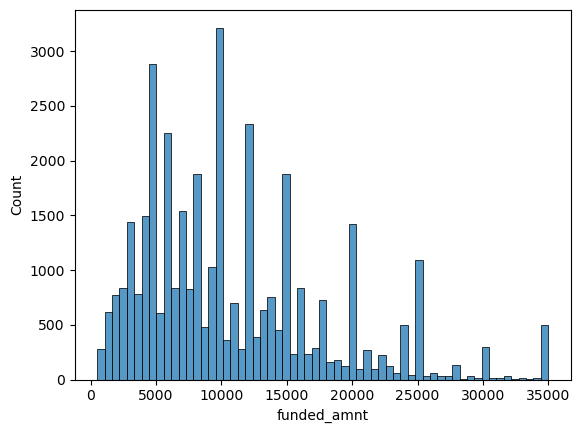

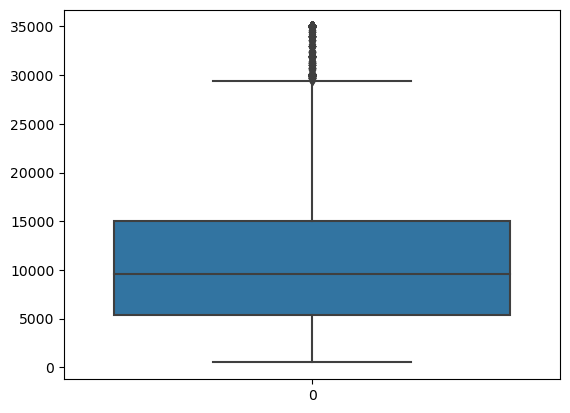

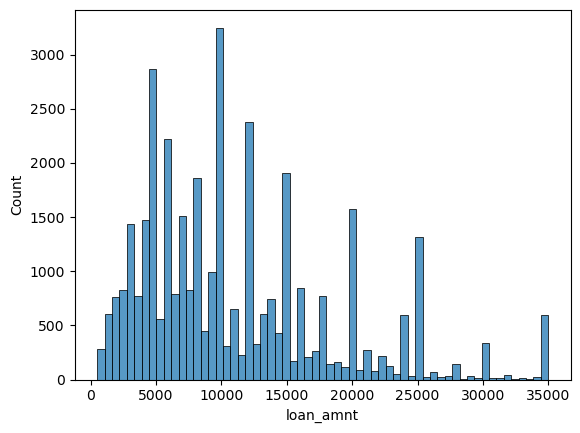

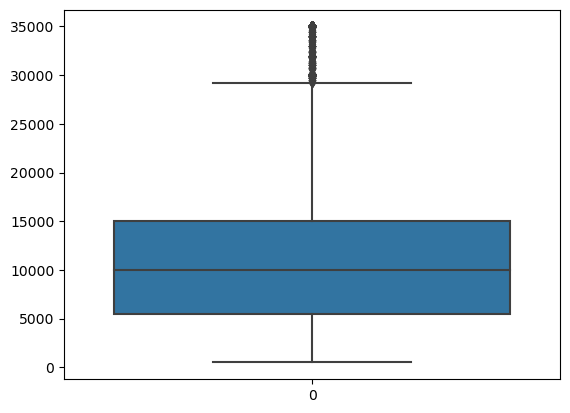

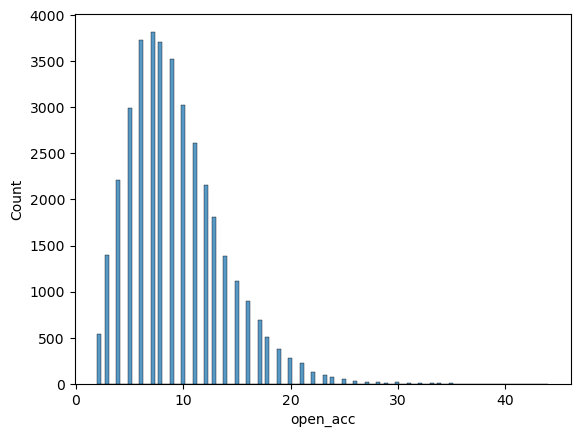

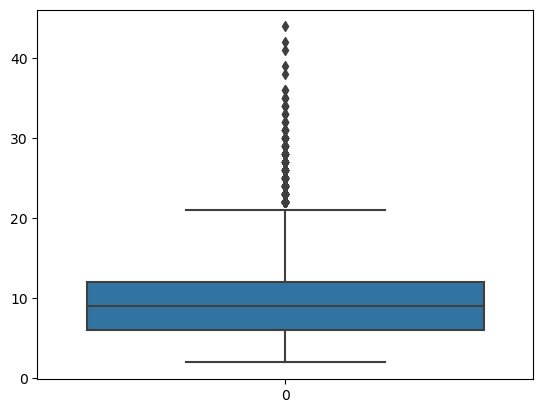

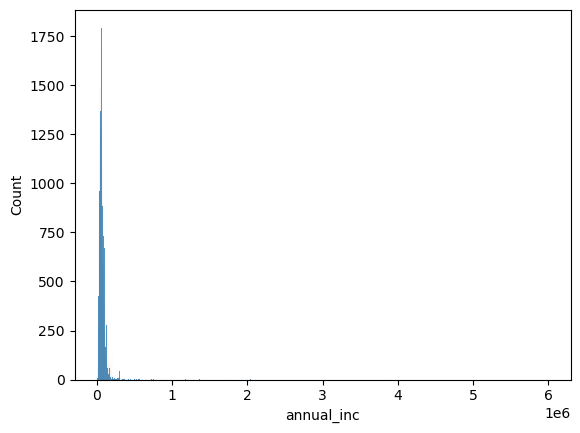

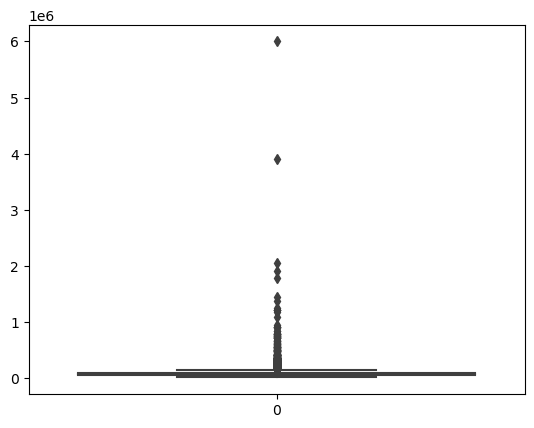

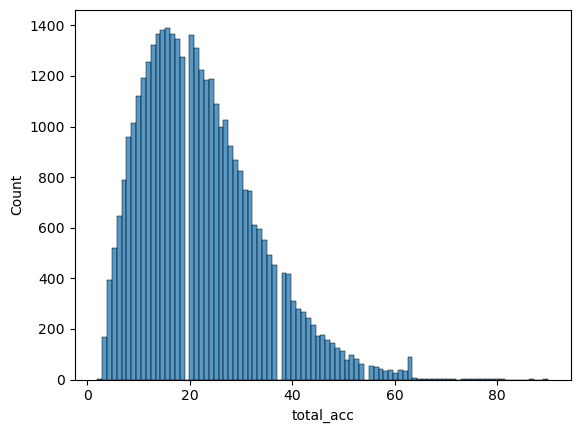

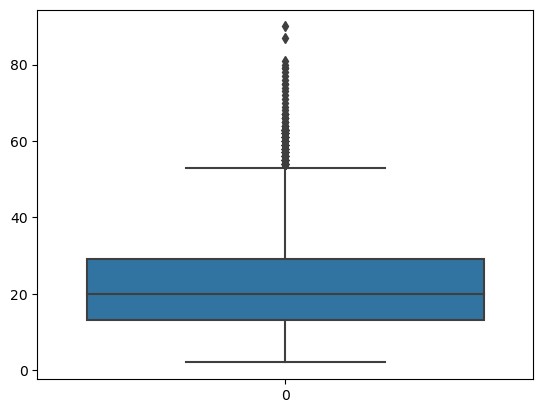

In [73]:
import seaborn as sns
for i in cont_data:
    sns.histplot(dfLoanDt[i])
    plt.show()
    sns.boxplot(dfLoanDt[i])
    plt.show()



- ### The open_acc,total_acc and annual_inc columns outlier values cleaned up and shape of the current loan data is (26701, 23)

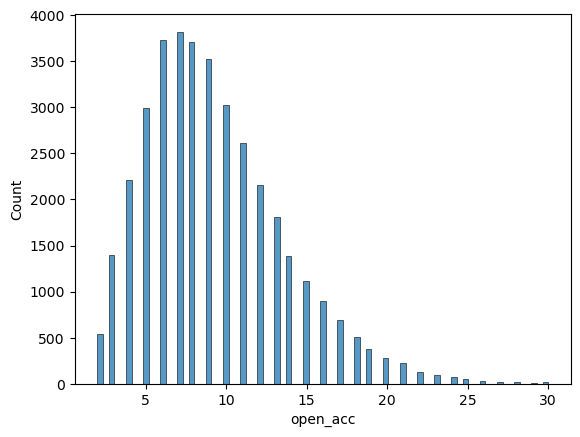

In [74]:
dfLoanDt = dfLoanDt[-(dfLoanDt['open_acc']>30)]
sns.histplot(dfLoanDt['open_acc'])
plt.show()

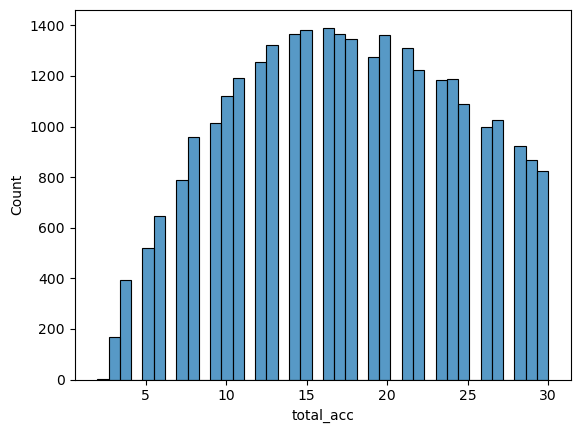

In [75]:
dfLoanDt = dfLoanDt[-(dfLoanDt['total_acc']>30)]
sns.histplot(dfLoanDt['total_acc'])
plt.show()


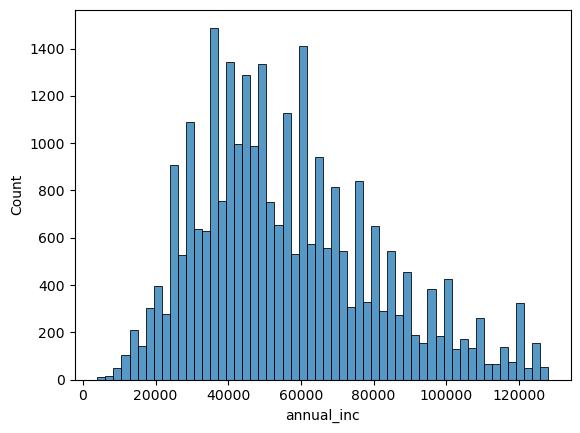

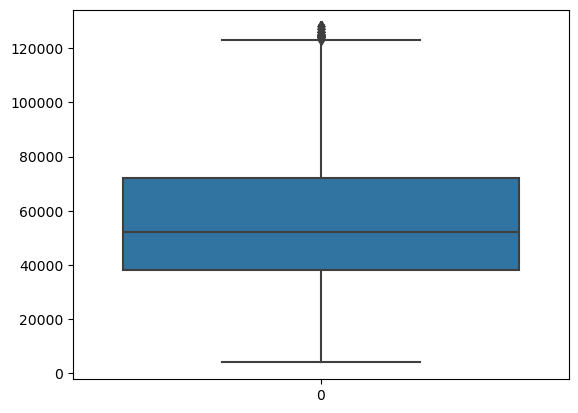

(28034, 22)

In [76]:
value = dfLoanDt['annual_inc'].quantile(q=0.95)
dfLoanDt = dfLoanDt[-(dfLoanDt['annual_inc']>value)]
dfLoanDt['annual_inc'].value_counts()
sns.histplot(dfLoanDt['annual_inc'])
plt.show()
sns.boxplot(dfLoanDt['annual_inc'])
plt.show()
dfLoanDt.shape

## Bivariate Analysis 

#### Purpose vs Status on the charged off category


<Axes: title={'center': 'Plot for the purpose towards charged off'}, ylabel='purpose'>

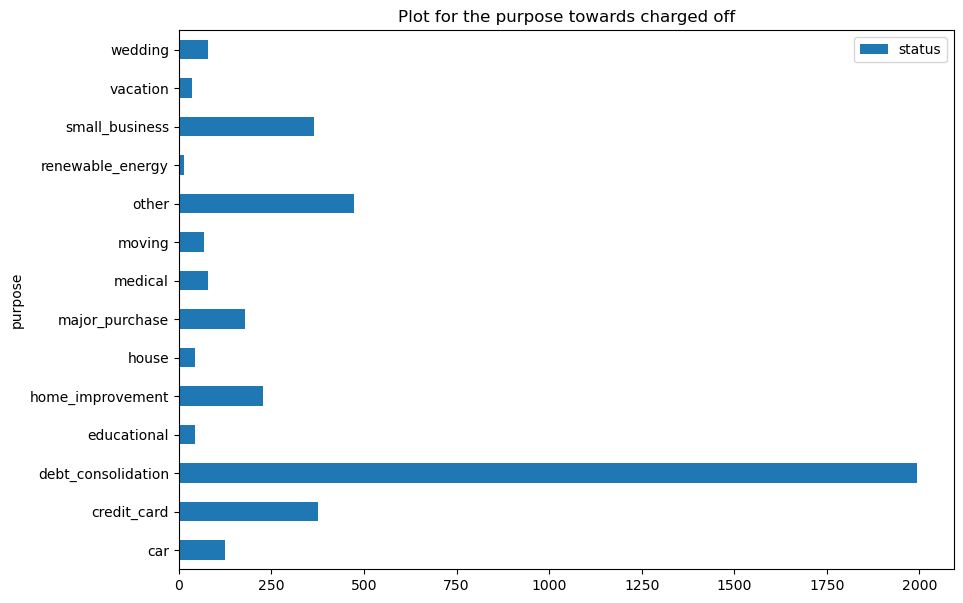

In [77]:
dfLoanDt['status']=dfLoanDt.apply(lambda x: 1 if x['loan_status']=='Charged Off' else 0,axis=1)
dfLoanDt['status'].value_counts()
pd.pivot_table(dfLoanDt, values='status', index=['purpose'],aggfunc=np.sum).plot.barh(figsize=(10,7),
                                                          title='Plot for the purpose towards charged off')



**Result:**

  - #### People taking the loan of the purpose of _debt_consolidation_ are having higher tendency of defaulting

#### Home_Ownership vs Charged off Category

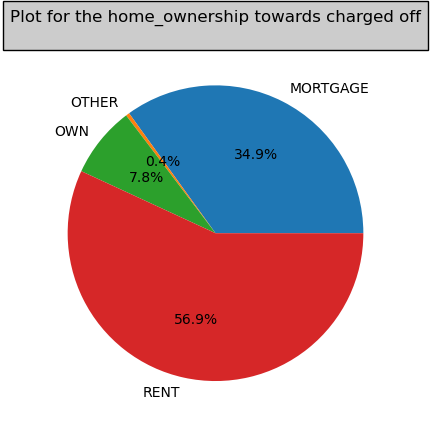

In [78]:
df_pivot = pd.pivot_table(dfLoanDt, values='status', index=['home_ownership'],aggfunc=np.sum)
df2 = df_pivot.reset_index()
df2['status']=round((df2['status']/df2['status'].sum())*100,2)
df2 = df2[-(df2['status']==0.0)]
plt.pie(df2['status'],labels = df2['home_ownership'],autopct='%1.1f%%')
plt.title("Plot for the home_ownership towards charged off\n", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

**Result:**

- #### People living in Rented home seems to be having higher tendency of defaulting

#### Comparison between the Grade towards charged off



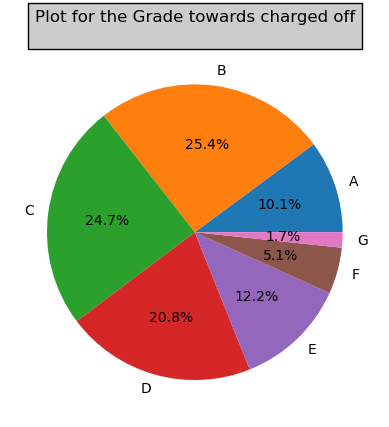

In [79]:
df_pivot = pd.pivot_table(dfLoanDt, values='status', index=['grade'],aggfunc=np.sum)
df2 = df_pivot.reset_index()
df2['status']=round((df2['status']/df2['status'].sum())*100,2)
df2 = df2[-(df2['status']==0.0)]
plt.pie(df2['status'],labels = df2['grade'],autopct='%1.1f%%')
plt.title("Plot for the Grade towards charged off\n", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

#### Based on the above analysis compared with B and C has 50% charged off. so we did further analyis Graded with Not verified data

<Axes: title={'center': 'Plot for the purpose towards charged off'}, ylabel='grade'>

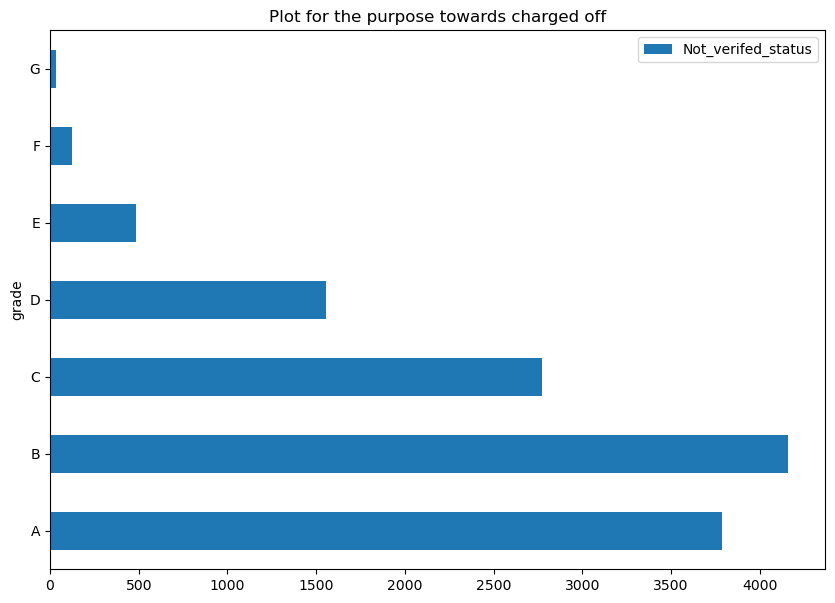

In [80]:
dfLoanDt['Not_verifed_status']=dfLoanDt.apply(lambda x: 1 if x['verification_status']=='Not Verified' else 0,axis=1)
dfLoanDt['Not_verifed_status'].value_counts()
pd.pivot_table(dfLoanDt, values='Not_verifed_status', index=['grade'],aggfunc=np.sum).plot.barh(figsize=(10,7),
                                                          title='Plot for the purpose towards charged off')

**Result**

#### Based on the above analysis the borrowers with category B and C  and are not verified caused the 50% of charged off. Therefore B and C grade without verified status can default the loan

**Comparison Between pub_rec_bankruptcies vs charged off**

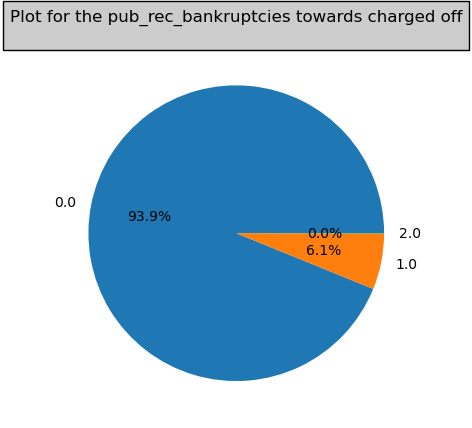

In [81]:
df_pivot = pd.pivot_table(dfLoanDt, values='status', index=['pub_rec_bankruptcies'],aggfunc=np.sum)
df3 = df_pivot.reset_index()
df3
df3['status']=round((df3['status']/df3['status'].sum())*100,2)
plt.pie(df3['status'],labels = df3['pub_rec_bankruptcies'],autopct='%1.1f%%')
plt.title("Plot for the pub_rec_bankruptcies towards charged off\n", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

**Result**

#### As per the analyis borrowers without pub_rec_bankruptcies towards charged have tendency of defaulting

## Segment bivariate Analysis



#### Binning the columns _revol_util_, _int_rate_, _annual_inc_ and _dti_groups_

In [82]:
dfLoanDt['revol_util_groups'] = pd.cut(dfLoanDt['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
dfLoanDt['int_rate_groups'] = pd.cut(dfLoanDt['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
dfLoanDt['annual_inc_groups'] = pd.cut(dfLoanDt['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])
dfLoanDt['dti_groups']=pd.cut(dfLoanDt.dti,bins=5,labels=['0-6','6-12','12-18','18-24','24-30'])

<Axes: xlabel='annual_inc_groups', ylabel='count'>

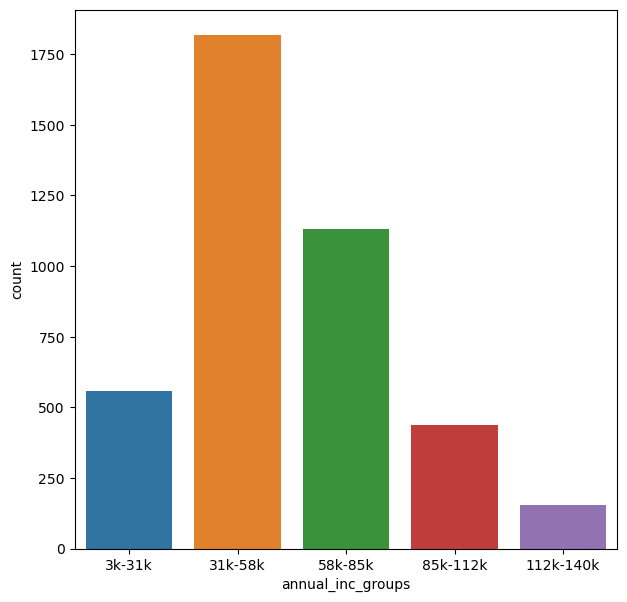

In [83]:
fig, ax = plt.subplots(figsize = (7,7))
sns.countplot(x='annual_inc_groups', data=dfLoanDt[dfLoanDt.loan_status == 'Charged Off'])


**Result**
#### Borrowers having annual income between 31k to 85k having higher tendency of defaulting 

<Axes: xlabel='int_rate_groups', ylabel='count'>

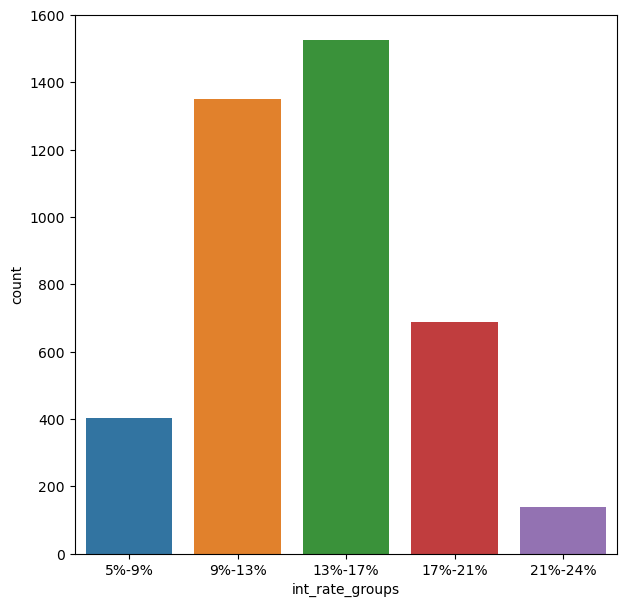

In [84]:
fig, ax = plt.subplots(figsize = (7,7))
sns.countplot(x='int_rate_groups', data=dfLoanDt[dfLoanDt.loan_status == 'Charged Off'])


**Result**
#### Borrowers given loan on intrest rate between 9% to 13% having higher tendency of defaulting 

<Axes: xlabel='dti_groups', ylabel='count'>

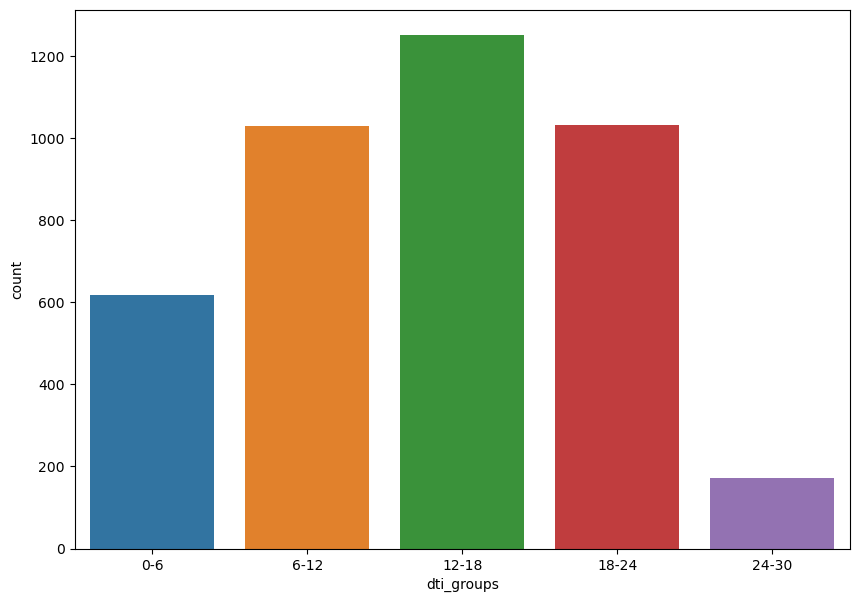

In [85]:

fig, ax = plt.subplots(figsize = (10,7))
sns.countplot(x='dti_groups', data=dfLoanDt[dfLoanDt.loan_status == 'Charged Off'])

**Result**
#### Borrowers in dti between 12 to 18 having higher tendency of defaulting 

<Axes: xlabel='verification_status', ylabel='count'>

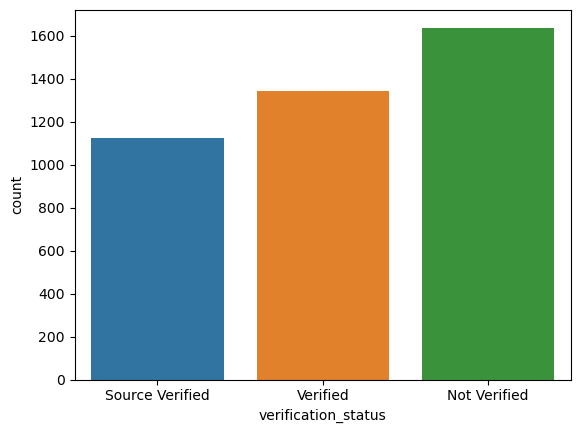

In [86]:

sns.countplot(x='verification_status', data=dfLoanDt[dfLoanDt['loan_status']=='Charged Off'])

**Result**
#### Borrowers with _verification status_ as <b>Not Verified</b> have high probablity of defaulting

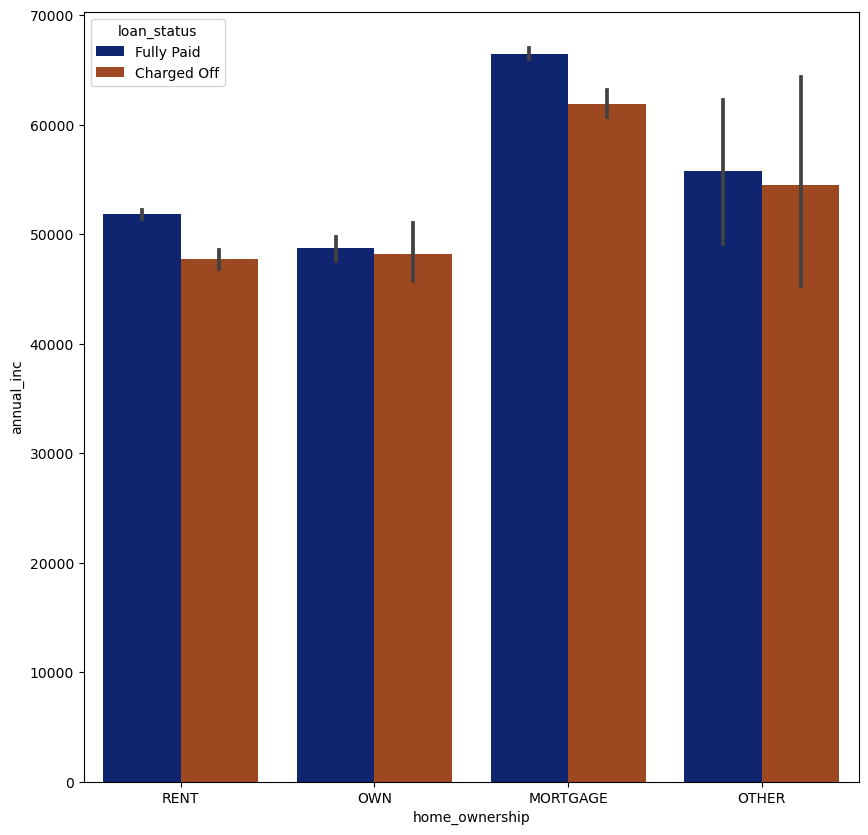

In [87]:
plt.figure(figsize=(10,10))
dfLoanDt=dfLoanDt[dfLoanDt['home_ownership']!='NONE']
sns.barplot(data =dfLoanDt,x='home_ownership', y='annual_inc', hue ='loan_status',palette="dark")
plt.show()

**Result**
#### Borrowers having MORTGAGED home with annual income > 50k tend to default

## Observation

### The analysis done with respect to the charged off loans. There is a more probability of defaulting when : 
- Borrowers having MORTGAGED home with annual income > 50k.
- Borrowers with _verification status_ as <b>Not Verified</b>.
- Borrowers given loan on intrest rate between 9% to 13%.
- Borrowers dti between 12 to 18. 
- Borrowers without pub_rec_bankruptcies towards charged off.
- Borrowers with category B and C and are not verified caused the 50% of charged off. Therefore B and C grade without verified status.
- Borrowers living in Rented homes.
- purpose of the loan is debt_consolidation.

#### Writing back the dataframe to excel file

In [89]:
dfLoanDt.to_excel("data/transformed_loan_data.xlsx")